SnowCV method to quantify snow height from phenocam staff gauge imagery.
For NEON Battelle
Donal O'Leary
April 12 2021

Borrowing liberally from <a href="https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/" target="_blank">this awesome tutorial by Adrian Rosebrock</a>.

In [1]:
import cv2
import imutils
from imutils import contours
import argparse
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# ap.add_argument("-r", "--reference", required=True,
# 	help="path to reference OCR-A image")
# args = vars(ap.parse_args())

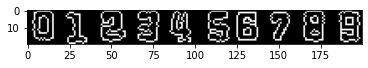

In [3]:
template = cv2.imread('/Users/olearyd/Git/SnowCV/data/number_template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
#template = cv2.threshold(template, 30, 255, cv2.THRESH_BINARY)[1]

template = cv2.resize(template, (200,20))
template_Canny = cv2.Canny(template , 10, 255)

template.shape
plt.imshow(template_Canny, cmap='gray')

In [4]:
templateCnts = cv2.findContours(template_Canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
templateCnts = imutils.grab_contours(templateCnts)
templateCnts = contours.sort_contours(templateCnts, method="left-to-right")[0]

templateCnts


(array([[[ 6,  0]],
 
        [[ 5,  1]],
 
        [[ 4,  1]],
 
        [[ 4,  5]],
 
        [[ 3,  6]],
 
        [[ 3,  7]],
 
        [[ 4,  8]],
 
        [[ 4, 10]],
 
        [[ 3, 11]],
 
        [[ 4, 12]],
 
        [[ 4, 15]],
 
        [[ 5, 16]],
 
        [[ 6, 16]],
 
        [[ 7, 17]],
 
        [[ 8, 16]],
 
        [[ 9, 17]],
 
        [[10, 16]],
 
        [[11, 17]],
 
        [[13, 17]],
 
        [[14, 16]],
 
        [[15, 16]],
 
        [[15,  2]],
 
        [[13,  0]]], dtype=int32),
 array([[[25,  1]],
 
        [[23,  3]],
 
        [[24,  4]],
 
        [[26,  4]],
 
        [[27,  5]],
 
        [[27,  7]],
 
        [[28,  8]],
 
        [[28,  9]],
 
        [[27, 10]],
 
        [[27, 11]],
 
        [[28, 12]],
 
        [[28, 14]],
 
        [[27, 15]],
 
        [[25, 15]],
 
        [[24, 16]],
 
        [[24, 18]],
 
        [[25, 19]],
 
        [[28, 19]],
 
        [[29, 18]],
 
        [[32, 18]],
 
        [[33, 19]],
 
        [[34, 18]],

In [5]:
digits = {}

for (i, c) in enumerate(templateCnts):
	# compute the bounding box for the digit, extract it, and resize
	# it to a fixed size
	(x, y, w, h) = cv2.boundingRect(c)
	roi = template[y:y + h, x:x + w]
	roi = cv2.resize(roi, (57, 88))
	# update the digits dictionary, mapping the digit name to the ROI
	digits[i] = roi

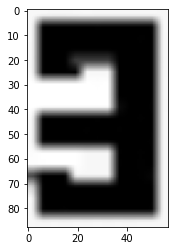

In [6]:
plt.imshow(digits[3], cmap='gray')

In [7]:
digits[3].shape

(88, 57)

In [8]:
ref = cv2.imread('/Users/olearyd/Git/SnowCV/data/NEON.D13.NIWO.DP1.00042_2020_01_10_101505.jpg')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 30, 255, cv2.THRESH_BINARY)[1]
ref

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
ref.shape

(960, 1296)

In [10]:
ROI = ref[600:850,870:920]

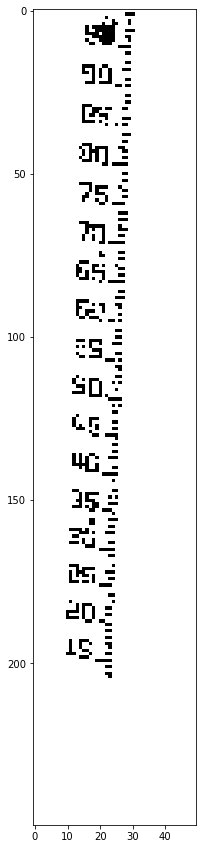

In [11]:
plt.rcParams['figure.figsize'] = [5, 15]
plt.imshow(ROI,cmap='gray')

In [12]:
# ## Plot image in external window
# cv2.imshow('image',ref)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

In [13]:
fifteen = ROI[192:200,8:19]
num_pair=fifteen

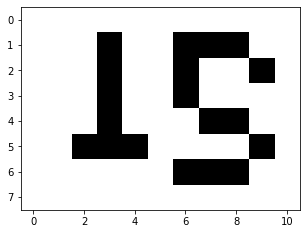

In [14]:
plt.imshow(fifteen,cmap='gray')

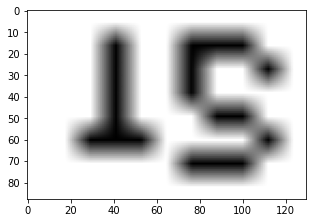

In [15]:
fifteen_big = cv2.resize(fifteen, (130,88))
plt.imshow(fifteen_big, cmap='gray')

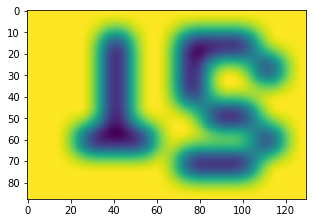

In [16]:
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
fifteen_big = cv2.blur(fifteen_big, (11,11))
plt.imshow(fifteen_big)

In [17]:
# fifteen = cv2.resize(fifteen_big, (11,8))
# plt.imshow(fifteen)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

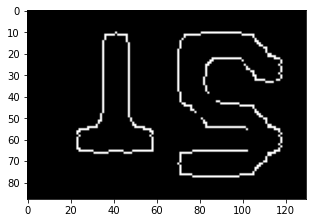

In [18]:
fifteen_big_Canny = cv2.Canny(fifteen_big, 10, 150)
plt.imshow(fifteen_big_Canny, cmap='gray')
fifteen_big_Canny

In [19]:
kernel = np.ones((5,5),np.uint8)

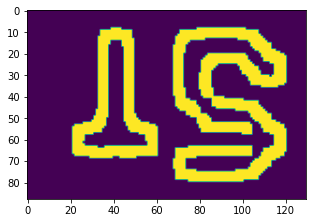

In [20]:
f_d = cv2.dilate(fifteen_big_Canny, kernel,iterations = 1)
plt.imshow(f_d)

In [21]:
## Get the contours of the individual numbers to then clip out each digit

num_pairCnts = cv2.findContours(f_d.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_pairCnts = imutils.grab_contours(num_pairCnts)
num_pairCnts = contours.sort_contours(num_pairCnts, method="left-to-right")[0]



In [22]:
len(num_pairCnts)

2

In [23]:
numbers = {}

for (i, c) in enumerate(num_pairCnts):
	# compute the bounding box for the digit, extract it, and resize
	# it to a fixed size
	(x, y, w, h) = cv2.boundingRect(c)
	roi = fifteen_big[y:y + h, x:x + w]
	roi = cv2.resize(roi, (57, 88))
	# update the digits dictionary, mapping the digit name to the ROI
	numbers[i] = roi

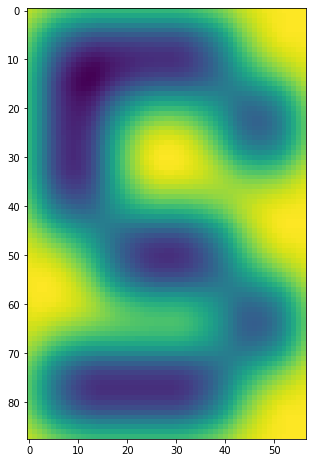

In [24]:
plt.imshow(numbers[1])

In [25]:


for i in range(len(numbers)):
#    print(i)
    scores=[]
    for j in range(len(digits)):
#        print(j)
        result = cv2.matchTemplate(numbers[i], digits[j], cv2.TM_CCOEFF)
        (_, score, _, _) = cv2.minMaxLoc(result)
        scores.append(score)
    print(str(np.argmax(scores)))
        
#str(np.argmax(scores))

1
5
